In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Physical devices cannot be modified after being initialized


In [24]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Data Preprocessing
### Preprocessed by ITBIN-2211-0233

Training Image Preprocessing

In [25]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [27]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [28]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 85.    75.5   74.75]
   [ 83.75  74.5   74.  ]
   [ 81.75  73.25  72.75]
   ...
   [ 82.5   78.25  84.5 ]
   [ 85.25  81.25  87.25]
   [ 94.5   89.5   96.5 ]]

  [[163.5  153.5  152.5 ]
   [161.   151.   150.  ]
   [159.5  149.5  148.5 ]
   ...
   [174.   169.   176.  ]
   [174.75 169.75 176.75]
   [177.25 172.25 179.25]]

  [[162.75 152.75 151.75]
   [161.75 151.75 150.75]
   [160.5  150.5  149.5 ]
   ...
   [178.   173.   180.  ]
   [184.25 179.25 186.25]
   [190.75 185.75 192.75]]

  ...

  [[147.25 137.25 135.25]
   [145.75 135.75 133.75]
   [144.5  134.5  132.5 ]
   ...
   [ 60.25  58.25  63.25]
   [ 60.5   58.5   63.5 ]
   [ 60.5   58.5   63.5 ]]

  [[149.25 139.25 137.25]
   [142.5  132.5  130.5 ]
   [144.   134.   132.  ]
   ...
   [ 62.    60.    65.  ]
   [ 60.    58.    63.  ]
   [ 62.5   60.5   65.5 ]]

  [[149.75 139.75 137.75]
   [146.75 136.75 134.75]
   [144.25 134.25 132.25]
   ...
   [ 62.5   60.5   65.5 ]
   [ 57.5   55.5   60.5 ]
   [ 57.    55.    6

Building Model

In [29]:

from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from keras.models import Sequential



In [30]:
model = Sequential()

###  To avoid overshooting

1.Choose default learning rate as 0.0001

2.There may be chance of underfitting, so increase the number of neurons

3.Add more convolution layer to extrat more feature from images, there may be some posibility that model unable to capture relevent feature or model is confusing due to lack of feature. so feed with more feature.


## Building convalution Layer
BUILD BY ITBIN-2211-0256

In [31]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Dropout(0.25)) # To avoid overfitting

In [37]:

model.add(Flatten())



In [38]:
model.add(Dense(units=1500,activation='relu'))

In [39]:
model.add(Dropout(0.4))

In [40]:
#Output layer
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [41]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

## MODEL TRAINING 

### Model Trained by ITBIN-2211-0258


In [43]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1574s 713ms/step - loss: 1.4395 - accuracy: 0.5778 - val_loss: 0.5139 - val_accuracy: 0.8379
Epoch 2/10
2197/2197 [==============================] - 1716s 781ms/step - loss: 0.4607 - accuracy: 0.8530 - val_loss: 0.3174 - val_accuracy: 0.8968
Epoch 3/10
2197/2197 [==============================] - 1510s 686ms/step - loss: 0.2789 - accuracy: 0.9102 - val_loss: 0.2200 - val_accuracy: 0.9284
Epoch 4/10
2197/2197 [==============================] - 1571s 715ms/step - loss: 0.1898 - accuracy: 0.9365 - val_loss: 0.2062 - val_accuracy: 0.9339
Epoch 5/10
2197/2197 [==============================] - 1559s 710ms/step - loss: 0.1397 - accuracy: 0.9541 - val_loss: 0.1935 - val_accuracy: 0.9398
Epoch 6/10
2197/2197 [==============================] - 1591s 724ms/step - loss: 0.1085 - accuracy: 0.9643 - val_loss: 0.1900 - val_accuracy: 0.9404
Epoch 7/10
2197/2197 [==============================] - 1515s 689ms/step - loss: 0.0876 - accuracy: 0.9709

## Model Saving

### Model Saved by ITBIN-2211-0258

In [44]:
model.save("trained_model.keras")

In [45]:
training_history.history

{'loss': [1.4394786357879639,
  0.46073153614997864,
  0.2789437174797058,
  0.1897670477628708,
  0.13968630135059357,
  0.10845748335123062,
  0.08759047836065292,
  0.07714004069566727,
  0.06165730953216553,
  0.056456420570611954],
 'accuracy': [0.5778077840805054,
  0.8530336618423462,
  0.910178542137146,
  0.9364961981773376,
  0.9540507793426514,
  0.9643360376358032,
  0.9709225296974182,
  0.9743936061859131,
  0.9804680347442627,
  0.9818621277809143],
 'val_loss': [0.5138722658157349,
  0.3174448311328888,
  0.2200040966272354,
  0.20616495609283447,
  0.19346854090690613,
  0.1900104135274887,
  0.19704560935497284,
  0.15233489871025085,
  0.127932608127594,
  0.13744719326496124],
 'val_accuracy': [0.8379239439964294,
  0.8967675566673279,
  0.9284088611602783,
  0.9338720440864563,
  0.9397905468940735,
  0.9403596520423889,
  0.9409856796264648,
  0.9537901282310486,
  0.9620987772941589,
  0.9624402523040771]}

In [46]:
# Recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Data visualization

### visualized by ITBIN-2211-0286

#### 1.Accuracy Visualization

In [47]:
training_history.history['accuracy']

[0.5778077840805054,
 0.8530336618423462,
 0.910178542137146,
 0.9364961981773376,
 0.9540507793426514,
 0.9643360376358032,
 0.9709225296974182,
 0.9743936061859131,
 0.9804680347442627,
 0.9818621277809143]

In [48]:
training_history.history['val_accuracy']

[0.8379239439964294,
 0.8967675566673279,
 0.9284088611602783,
 0.9338720440864563,
 0.9397905468940735,
 0.9403596520423889,
 0.9409856796264648,
 0.9537901282310486,
 0.9620987772941589,
 0.9624402523040771]

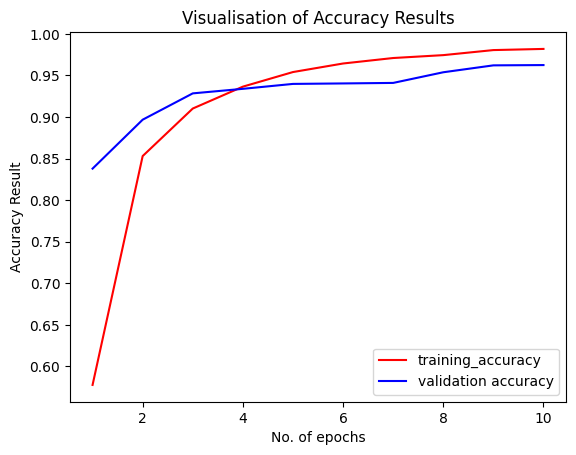

In [49]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualisation of Accuracy Results")
plt.legend()
plt.show()

By ITBIN-2211-0254

Other metrics for model evaluation

In [5]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [50]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [51]:
y_pred = model.predict(test_set)
y_pred

550/550 [==============================] - 81s 146ms/step


array([[9.9999952e-01, 4.7788558e-07, 2.7117909e-12, ..., 1.0986528e-16,
        1.7185952e-15, 5.7888949e-14],
       [9.9999690e-01, 1.7733490e-06, 1.0472816e-09, ..., 7.9280099e-13,
        1.2485481e-12, 1.3658149e-11],
       [1.0000000e+00, 4.6404958e-10, 2.3700791e-10, ..., 1.7398063e-19,
        5.5450906e-16, 1.2738449e-13],
       ...,
       [1.7325452e-14, 8.7632091e-16, 5.7178060e-12, ..., 1.1557590e-13,
        3.0136539e-15, 1.0000000e+00],
       [1.1079357e-12, 1.1444393e-14, 6.5253319e-12, ..., 1.6447347e-12,
        2.4308226e-14, 9.9999988e-01],
       [3.0020390e-17, 1.9651975e-18, 1.8904774e-15, ..., 1.6165159e-17,
        1.0248346e-17, 1.0000000e+00]], dtype=float32)

In [52]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [53]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [54]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [55]:
Y_true = predicted_categories = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
classification_report(Y_true,predicted_categories,target_names=class_name)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       1.00      1.00      1.00       504\n                                 Apple___Black_rot       1.00      1.00      1.00       497\n                          Apple___Cedar_apple_rust       1.00      1.00      1.00       440\n                                   Apple___healthy       1.00      1.00      1.00       502\n                               Blueberry___healthy       1.00      1.00      1.00       454\n          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421\n                 Cherry_(including_sour)___healthy       1.00      1.00      1.00       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       1.00      1.00      1.00       410\n                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477\n               Corn_(maize)___Northern_Leaf_Blight       1.00      

In [58]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[504,   0,   0, ...,   0,   0,   0],
       [  0, 497,   0, ...,   0,   0,   0],
       [  0,   0, 440, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 490,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 481]], dtype=int64)

## Confusion Matrix Visualization

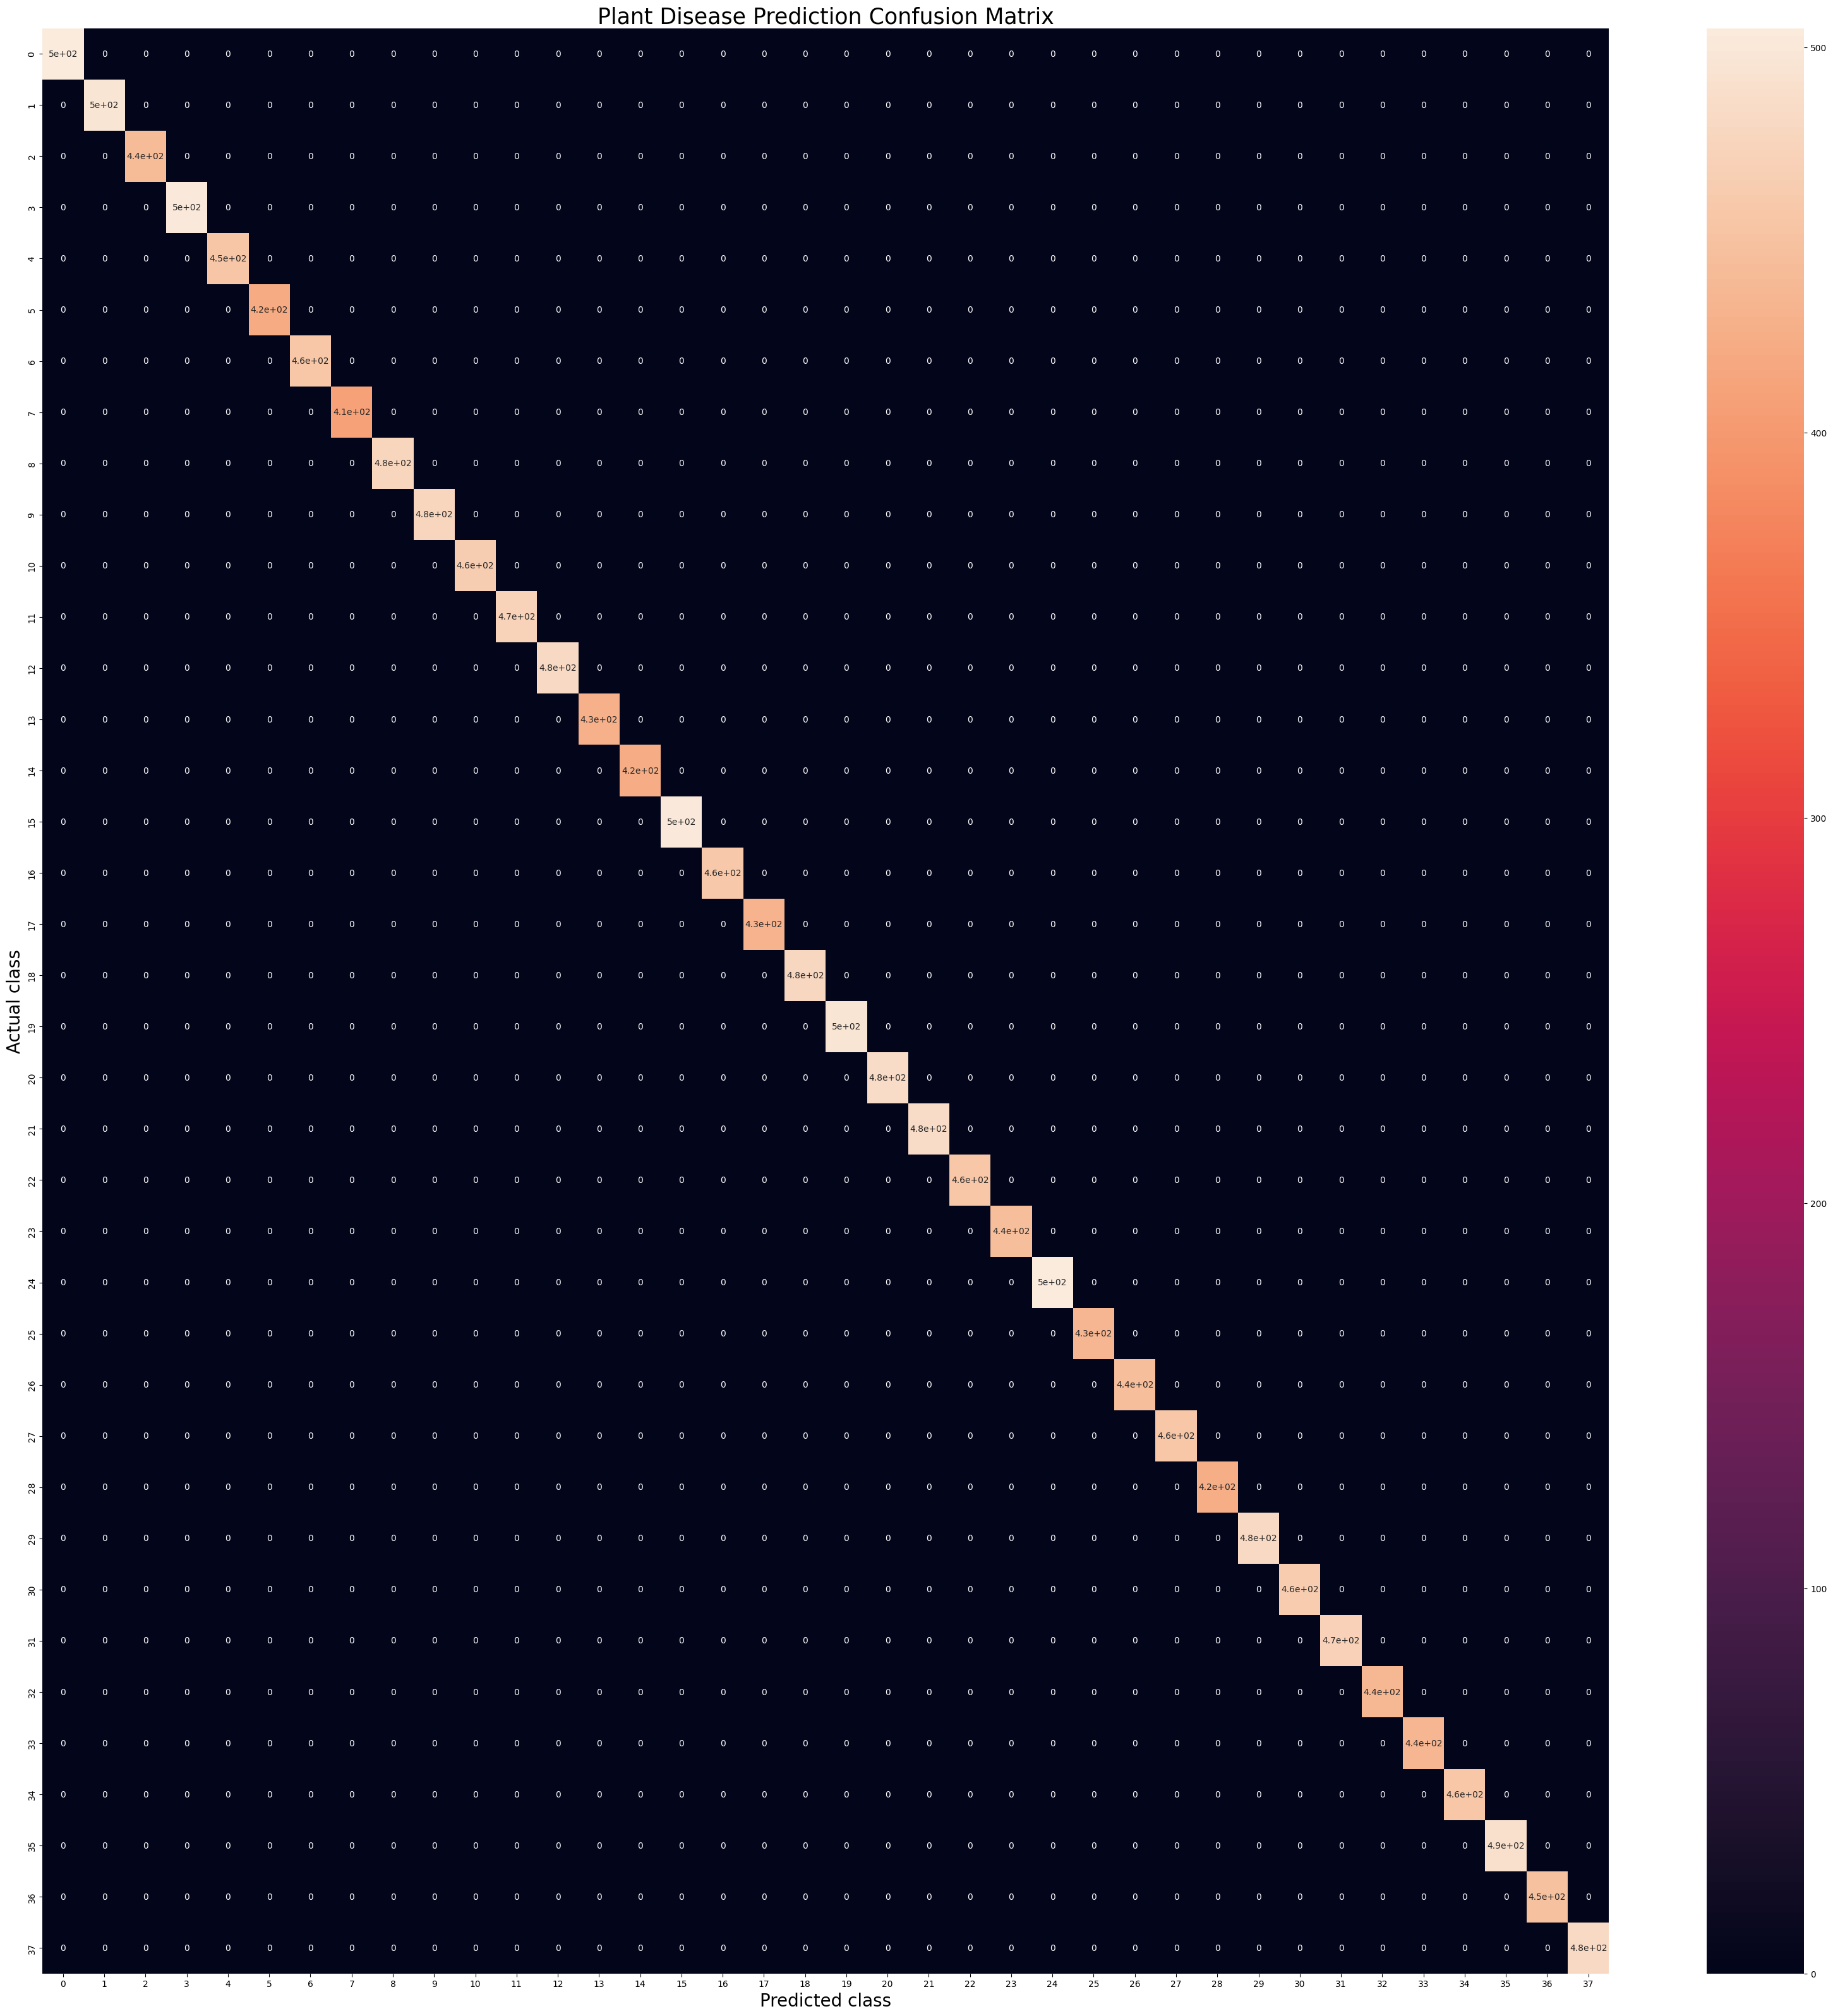

In [59]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted class",fontsize=20)
plt.ylabel("Actual class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()